In [14]:
import torch
import torch.nn as nn
from numpy import random
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [15]:
data = random.randint(0,100,(10000,5))
test_data = random.randint(0,100,(1000,5))

In [16]:
class DatasetFromData(Dataset):
    def __init__(self,arr) -> None:
        super().__init__()
        self.arr = arr 
    def __getitem__(self, index):
        i = self.arr[index]
        if(i.sum()>400): val = 4
        elif(i.sum()>300): val = 3
        elif(i.sum()>200): val = 2
        elif(i.sum()>100): val = 1
        else: val = 0
        return torch.tensor(i.sum(),dtype=torch.float).unsqueeze(0),val

    def __len__(self):
        return len(self.arr)

In [17]:
train_ds = DatasetFromData(data)
train_dl  = DataLoader(train_ds,100,shuffle=True,drop_last=True)
test_ds = DatasetFromData(test_data)
test_dl  = DataLoader(test_ds,100,shuffle=True,drop_last=True)

In [18]:
model  = nn.Linear(1,5)

In [19]:
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(),lr=0.01)

In [20]:
for marks,label in train_dl:
        print(marks.shape)
        preds = model(marks.type(dtype=torch.float))
        break

torch.Size([100, 1])


In [21]:
losses = []
prog_bar = tqdm(range(100))
for i in prog_bar:
    for marks,label in train_dl:
        preds = model(marks.type(dtype=torch.float))
        loss = criterion(preds,label)
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(loss.item())
    prog_bar.set_description(desc=f"Loss: {loss.item()}")

Loss: 0.2756722569465637: 100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


In [27]:
for marks,labels in test_dl:
    preds = model(marks)
    preds = torch.argmax(preds,1)
    print((preds.detach().numpy() == labels.numpy()).mean())
    break

0.97


In [50]:
a = torch.randint(200,300,(1,1),dtype=torch.float)
pred = model(a)
print(a.item(),pred[0].detach().numpy())
torch.argmax(pred,1).item()

217.0 [-113.58396 -104.94527 -102.89301 -108.14227 -109.65129]


2

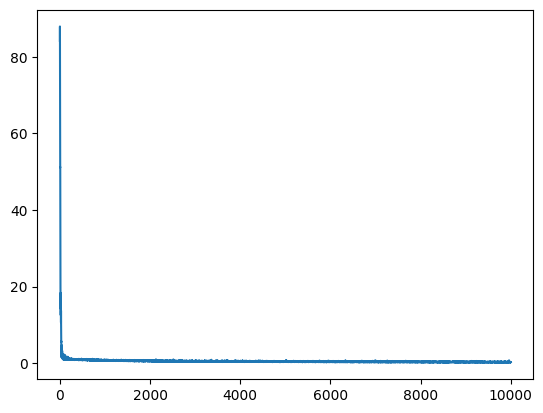

In [46]:
plt.plot(losses)